# Tuning SVM hyperparameters on spambase dataset

There are two hyperparameters

1. C - the regularization parameter
2. gamma - the kernel bandwidth for the Gaussian kernel

Both the hyperparameters are optimized on the log-scale. The loss function here is the square root of the misclassification rate.

In [1]:
import numpy as np
import pandas as pd

from fcvopt.optimizers.fcvopt import FCVOpt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 300

In [2]:
# loading dataset
dat = pd.read_csv('data/spambase.data',header=None)
X = dat.values[:,:-1]
y = dat.values[:,-1]

In [3]:
# define classifier object and the hyperparameter bounds
clf = Pipeline([('scale',StandardScaler()),
                 ('svc',SVC())])
param_bounds = {'svc__C':[np.exp(-10),np.exp(10)],
                'svc__gamma':[np.exp(-10),np.exp(10)]}

In [4]:
# optimizing square root of misclass rate
def sqrt_mcr(y_true,y_pred):
    return np.sqrt(1-accuracy_score(y_true,y_pred))

# define optimizer object
opt = FCVOpt(clf,param_bounds,sqrt_mcr,kernel="matern",
             logscale=np.array([0,1]),max_iter=30,
             integer = [],
             seed=1234,verbose=2,
             n_folds=5,n_init=3)

# tune hyperparameters
opt.run(X,y)

  iter    f_best   acq_best    sigma_f
     0 5.184e-01 3.790e-01 9.977e-02
     1 5.201e-01 3.785e-01 1.045e-01
     2 4.581e-01 3.370e-01 9.716e-02
     3 3.635e-01 2.276e-01 1.093e-01
     4 3.204e-01 1.892e-01 1.298e-01
     5 2.927e-01 1.498e-01 1.375e-01
     6 2.700e-01 1.254e-01 1.448e-01
     7 2.563e-01 1.461e-01 1.488e-01
     8 2.603e-01 2.085e-01 1.355e-01
     9 2.549e-01 2.141e-01 1.422e-01
  iter    f_best   acq_best    sigma_f
    10 2.487e-01 2.251e-01 1.630e-01
    11 2.457e-01 2.251e-01 1.695e-01
    12 2.514e-01 2.229e-01 1.590e-01
    13 2.496e-01 2.322e-01 1.543e-01
    14 2.490e-01 2.266e-01 1.370e-01
    15 2.460e-01 2.312e-01 1.498e-01
    16 2.477e-01 2.339e-01 1.478e-01
    17 2.486e-01 2.346e-01 1.510e-01
    18 2.486e-01 2.358e-01 1.616e-01
    19 2.498e-01 2.310e-01 1.528e-01
  iter    f_best   acq_best    sigma_f
    20 2.517e-01 2.405e-01 1.526e-01
    21 2.515e-01 2.384e-01 1.636e-01
    22 2.541e-01 2.445e-01 1.461e-01
    23 2.538e-01 2.441e-01 1.552

{'x_best': array([2.20264658e+04, 1.35426688e-04]),
 'f_best': 0.25174298189573496,
 'acq_cand': 0.24562970865312678,
 'x_cand': array([2.20264658e+04, 1.35426688e-04])}

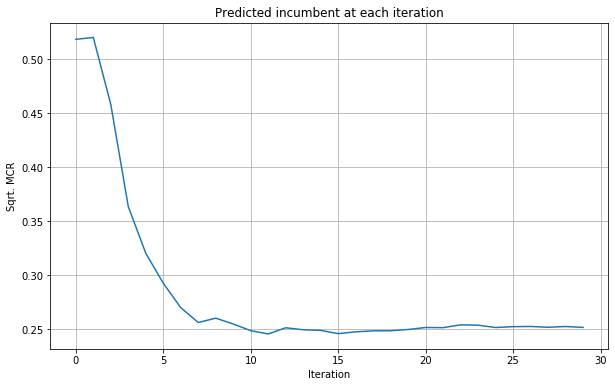

In [5]:
plt.figure(figsize=(10,6))
plt.plot(opt.y_inc) # plot predicted incumbent value at each iteration
plt.xlabel('Iteration')
plt.ylabel('Sqrt. MCR')
plt.title('Predicted incumbent at each iteration')
plt.grid()
plt.show()

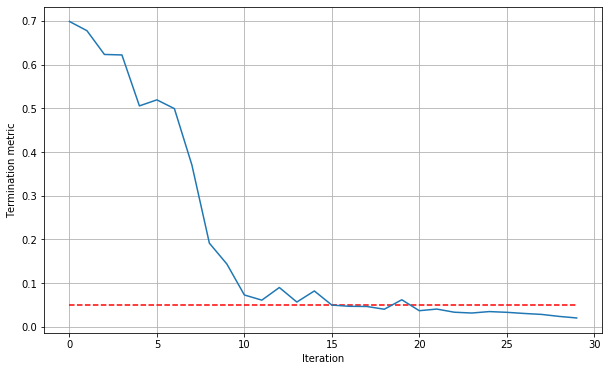

In [6]:
# plotting termination metric
plt.figure(figsize=(10,6))
plt.hlines(0.05,0,opt.max_iter-1,
           linestyles="dashed",colors="red")
plt.plot(opt.term_crit())
plt.xlabel('Iteration')
plt.ylabel('Termination metric')
plt.grid()
plt.show()